# ODEs for simulating  AHL and Arabinose Controlled Bistable Toggle Switch

\begin{align*}
\frac{d[AHL]}{dt} &= \underbrace{0}_{\text{Constant (external inducer)}} \\
\frac{d[Arabinose]}{dt} &= \underbrace{0}_{\text{Constant (external inducer)}} \\
\\
\frac{d[LuxR]}{dt} &= \underbrace{k_1}_{\text{Production rate}} - \underbrace{r_1 \times [LuxR]}_{\text{Degradation rate}} \\
\frac{d[AraC]}{dt} &= \underbrace{k_2}_{\text{Production rate}} - \underbrace{r_2 \times [AraC]}_{\text{Degradation rate}} \\
\frac{d[SupD]}{dt} &= \underbrace{k_3 \times [AHL] \times [LuxR]}_{\text{Production rate}} - \underbrace{k_{ass} \times [SupD] \times [T7ptag]}_{\text{Complex formation rate}} - \underbrace{r_3 \times [SupD]}_{\text{Degradation rate}} \\
\frac{d[T7ptag]}{dt} &= \underbrace{k_4 \times [Arabinose] \times [AraC]}_{\text{Production rate}} - \underbrace{k_{ass} \times [SupD] \times [T7ptag]}_{\text{Complex formation rate}} - \underbrace{r_4 \times [T7ptag]}_{\text{Degradation rate}} \\
\frac{d[T7pol]}{dt} &= \underbrace{k_{ass} \times [SupD] \times [T7ptag]}_{\text{Complex formation rate}} - \underbrace{r_5 \times [T7pol]}_{\text{Degradation rate}} \\
\\
\frac{d[C1]}{dt} &= \underbrace{k_5 \times [T7pol]}_{\text{Production rate (T7pol initiated)}} + \underbrace{k_6 \times \frac{[C1]}{k_{dc1rm} + [C1]}}_{\text{Autoregulation}} - \underbrace{r_6 \times [C1]}_{\text{Degradation rate}} \\
\\
\frac{d[GFP]}{dt} &= \underbrace{m_{gfpR} \times \frac{k_{dc1}^2}{k_{dc1}^2 + [C1]^2}}_{\text{Production rate from pR(repression by C1)}} + \underbrace{m_{gfpL} \times \frac{k_{dc1}^2}{k_{dc1}^2 + [C1]^2}}_{\text{Production rate from pL(repression by C1)}} - \underbrace{r_7 \times [GFP]}_{\text{Degradation rate}}
\end{align*}


In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
# System of ODEs
def system_of_ODEs(Y, t, k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7):
    AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP = Y
    
    dAHL_dt = 0  # Placeholder as AHL does not change
    dArabinose_dt = 0  # Placeholder as Arabinose does not change
    
    dLuxR_dt = k1 - r1 * LuxR
    dAraC_dt = k2 - r2 * AraC
    dSupD_dt = k3 * AHL * LuxR - kass * SupD * T7ptag - r3 * SupD
    dT7ptag_dt = k4 * Arabinose * AraC - kass * SupD * T7ptag - r4 * T7ptag
    dT7pol_dt = kass * SupD * T7ptag - r5 * T7pol
    
    # C1 transcription from pT7 promoter after production of T7 pol
    # C1 transcription from pRM promoter in the toggle switch
    # Combining both contributions to C1 dynamics
    dC1_dt = k5 * T7pol + k6 * (C1/ (kdc1rm +C1)) - r6 * C1
    
#     # C1 trxn from pT7 promoter after production of T7 pol
#     dC1_dt = k5 * T7pol - r6 * C1
    
#     # C1 trxn from pRM promoter in the toggle switch
#     dC1_dt = k6 * C1 - r6 * C1
    
    # Hill functions are used to model repression of GFP and Cro from pL and pR promoters respectively
    # mgfbR - max rate of gfp production from pR
    # mgfbR - max rate of gfp production from pL
    # kdc1 is the dissociation constant of C1
    # 3 here is the hill coefficient and is set to 3 because both promoters have three binding sites for c1
    dGFP_dt = mgfbR * (kdc1**2 / (kdc1**2 + C1**2)) + mgfbL * (kdc1**2 / (kdc1**2 + C1**2)) - r7 * GFP

    return [dAHL_dt, dArabinose_dt, dLuxR_dt, dAraC_dt, dSupD_dt, dT7ptag_dt, dT7pol_dt, dC1_dt, dGFP_dt]


In [99]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm = 0.9, 0.8, 0.5, 0.6, 1.0, 0.7, 1.5, 1.2, 0.1, 1.0, 2.0
r1, r2, r3, r4, r5, r6, r7 = 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1


# Time vector
t1 = np.linspace(0, 100, 100)

# Initial conditions AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP
initial_conditions = [0, 0, 0, 0, 0, 0, 0, 0, 0]  # Initial concentrations

# Solving the ODEs for different scenarios
# Scenario 1: Both AHL and Arabinose are present
Y1 = odeint(system_of_ODEs, initial_conditions, t1, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))
GFP1 = Y1[:, 8]

# Scenario 2: AHL is present, Arabinose is absent
initial_conditions[0] = 1  # Arabinose is absent
Y2 = odeint(system_of_ODEs, initial_conditions, t1, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))
GFP2 = Y2[:, 8]

# Scenario 3: AHL is absent, Arabinose is present
initial_conditions[0] = 0  # AHL is absent
initial_conditions[1] = 1  # Resetting Arabinose
Y3 = odeint(system_of_ODEs, initial_conditions, t1, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))
GFP3 = Y3[:, 8]

# Scenario 4: Both AHL and Arabinose are present
initial_conditions[0] = 1  
initial_conditions[1] = 1  
Y4 = odeint(system_of_ODEs, initial_conditions, t1, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))
GFP4 = Y4[:, 8]


In [100]:
# Initial conditions AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP
initial_conditions = Y4[-1, :]
initial_conditions[0] = 0
initial_conditions[1] = 0
t2 = np.linspace(100, 200, 100)
Y_new = odeint(system_of_ODEs, initial_conditions, t2, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))

In [101]:
# Initial conditions AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP, Cro
initial_conditions = Y_new[-1, :]

t3 = np.linspace(201, 300, 100)

Y_new_2 = odeint(system_of_ODEs, initial_conditions, t3, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))

In [102]:
# Initial conditions AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP, Cro
initial_conditions = Y_new_2[-1, :]
t4 = np.linspace(301, 400, 100)
Y_new_3 = odeint(system_of_ODEs, initial_conditions, t4, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))

In [114]:
# Define your ODE system
def system_with_noise(Y, t, k1, k2, k3, k4, k5, k6,mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7):
    AHL, Arabinose, LuxR, AraC, SupD, T7ptag, T7pol, C1, GFP = Y
    
    # Add noise to some variables (GFP, cro, C1)
    noise_intensity = 0.1  # Adjust as needed
    noise = np.random.normal(0, noise_intensity)

    dAHL_dt = 0  # Placeholder as AHL does not change
    dArabinose_dt = 0  # Placeholder as Arabinose does not change
    
    dLuxR_dt = k1 - r1 * LuxR 
    dAraC_dt = k2 - r2 * AraC
    dSupD_dt = k3 * AHL * LuxR - kass * SupD * T7ptag - r3 * SupD
    dT7ptag_dt = k4 * Arabinose * AraC - kass * SupD * T7ptag - r4 * T7ptag
    dT7pol_dt = kass * SupD * T7ptag - r5 * T7pol
    
    # C1 transcription from pT7 promoter after production of T7 pol
    # C1 transcription from pRM promoter in the toggle switch
    # Combining both contributions to C1 dynamics
    dC1_dt = k5 * T7pol + k6 * (C1/ (kdc1rm +C1)) - r6 * C1 + noise
      
    # C1 trxn from pT7 promoter after production of T7 pol
    # dC1_dt = k5 * T7pol - r6 * C1

    # # C1 trxn from pRM promoter in the toggle switch
    # dC1_dt = k6 * C1 - r6 * C1
    
    # Hill functions are used to model repression of GFP and Cro from pL and pR promoters respectively
    # mgfp - max rate of gfp production
    # mcro - max rate of cro production
    # kdc1 is the dissociation constant of C1
    # 3 here is the hill coefficient and is set to 3 because both promoters have three binding sites for c1
    dGFP_dt = mgfbR * (kdc1**2 / (kdc1**2 + C1**2)) + mgfbL * (kdc1**2 / (kdc1**2 + C1**2)) - r7 * GFP + noise

    return [dAHL_dt, dArabinose_dt, dLuxR_dt, dAraC_dt, dSupD_dt, dT7ptag_dt, dT7pol_dt, dC1_dt, dGFP_dt]
    # Example of adding noise to a variable's derivative
    # dX_dt = f(X) + noise


# ODE solver
t5 = np.linspace(401, 500, 100)
# pick a point where system has stabilised
initial_conditions = Y_new_3[-1, :]
solution = odeint(system_with_noise, initial_conditions, t5, 
                  args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))

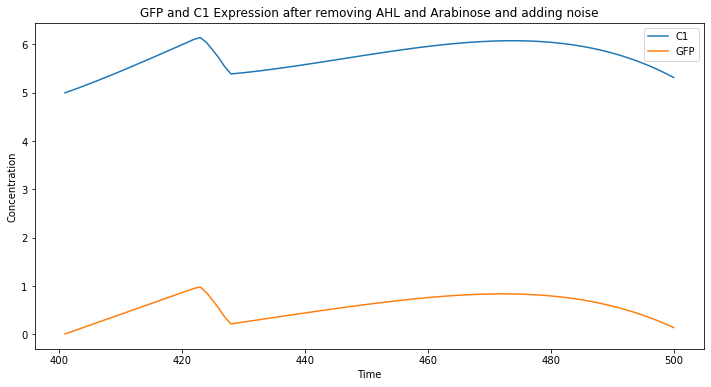

In [115]:
# Plotting the results for different scenarios
plt.figure(figsize=(12, 6))

# Plot for Scenario 4: Both AHL and Arabinose are removed
plt.plot(t5, solution[:,7], label='C1')
plt.plot(t5, solution[:,8], label='GFP')

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('GFP and C1 Expression after removing AHL and Arabinose and adding noise')
plt.legend()

# Display the plot
plt.show()

In [116]:
# after a noisy interval, let's see how the system will behave
initial_conditions = solution[-1, :]

t6 = np.linspace(501, 600, 100)

after_noise = odeint(system_of_ODEs, initial_conditions, t6, args=(k1, k2, k3, k4, k5, k6, mgfbR, mgfbL, kdc1, kass, kdc1rm, r1, r2, r3, r4, r5, r6, r7))

In [117]:
import matplotlib.gridspec as gridspec

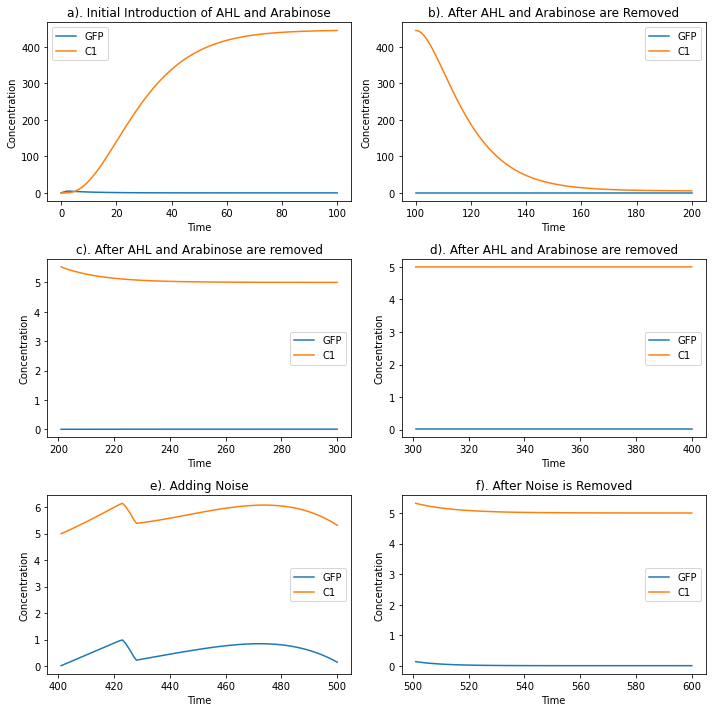

In [119]:
# Create a grid for the subplots
fig = plt.figure(figsize=(10, 10))  # Adjusted size for more plots
gs = gridspec.GridSpec(3, 2)  # 3 rows, 2 columns for 6 plots

# Plot for Scenario 1: Initial introduction of AHL and Arabinose
ax0 = plt.subplot(gs[0, 0])
ax0.plot(t1, GFP4, label='GFP')
ax0.plot(t1, Y4[:,7], label='C1')
ax0.set_title('a). Initial Introduction of AHL and Arabinose')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.legend()

# Plot for Scenario 2: After AHL and Arabinose are removed
ax1 = plt.subplot(gs[0, 1])
ax1.plot(t2, Y_new[:,8], label='GFP')
ax1.plot(t2, Y_new[:,7], label='C1')
ax1.set_title('b). After AHL and Arabinose are Removed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.legend()

# Plot for Scenario 3: After AHL and Arabinose are removed
ax2 = plt.subplot(gs[1, 0])
# Assuming you have data for t3
ax2.plot(t3, Y_new_2[:,8], label='GFP')  # Replace with your actual data
ax2.plot(t3, Y_new_2[:,7], label='C1')  # Replace with your actual data
ax2.set_title('c). After AHL and Arabinose are removed')
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.legend()

# Plot for Scenario 4: After AHL and Arabinose are removed
ax3 = plt.subplot(gs[1, 1])
# Assuming you have data for t4
ax3.plot(t4, Y_new_3[:,8], label='GFP')  # Replace with your actual data
ax3.plot(t4, Y_new_3[:,7], label='C1')  # Replace with your actual data
ax3.set_title('d). After AHL and Arabinose are removed')
ax3.set_xlabel('Time')
ax3.set_ylabel('Concentration')
ax3.legend()

# Plot for Scenario 3: Adding Noise
ax4 = plt.subplot(gs[2, 0])
ax4.plot(t5, solution[:,8], label='GFP')
ax4.plot(t5, solution[:,7], label='C1')
ax4.set_title('e). Adding Noise')
ax4.set_xlabel('Time')
ax4.set_ylabel('Concentration')
ax4.legend()

# Plot for Scenario 4: After Noise is Removed
ax5 = plt.subplot(gs[2, 1])
ax5.plot(t6, after_noise[:,8], label='GFP')
ax5.plot(t6, after_noise[:,7], label='C1')
ax5.set_title('f). After Noise is Removed')
ax5.set_xlabel('Time')
ax5.set_ylabel('Concentration')
ax5.legend()

# Adjust layout
plt.tight_layout()
plt.show()

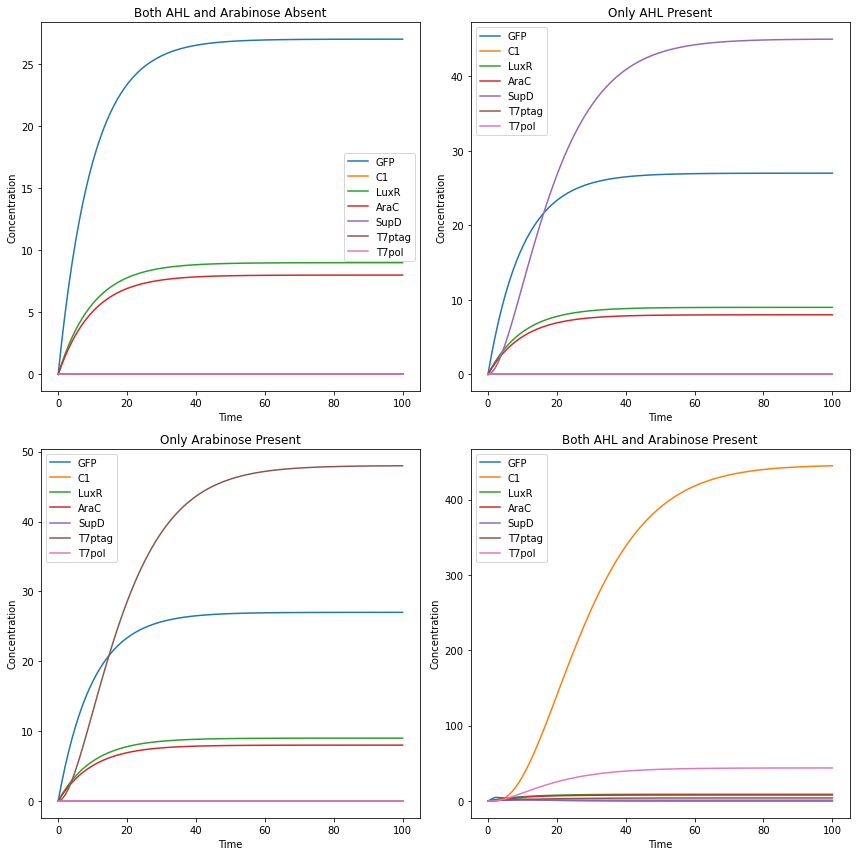

In [108]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a grid for the subplots
fig = plt.figure(figsize=(12, 12))  # Adjusted size for more plots
gs = gridspec.GridSpec(2, 2)  # 2 rows, 2 columns for 4 plots

# Plot for Scenario 1: Both AHL and Arabinose are absent
ax0 = plt.subplot(gs[0, 0])
ax0.plot(t1, GFP1, label='GFP')
ax0.plot(t1, Y1[:,7], label='C1')
ax0.plot(t1, Y1[:,2], label='LuxR')
ax0.plot(t1, Y1[:,3], label='AraC')
ax0.plot(t1, Y1[:,4], label='SupD')
ax0.plot(t1, Y1[:,5], label='T7ptag')
ax0.plot(t1, Y1[:,6], label='T7pol')
ax0.set_title('Both AHL and Arabinose Absent')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.legend()

# Plot for Scenario 2: Only AHL present
ax1 = plt.subplot(gs[0, 1])
ax1.plot(t1, GFP2, label='GFP')
ax1.plot(t1, Y2[:,7], label='C1')
ax1.plot(t1, Y2[:,2], label='LuxR')
ax1.plot(t1, Y2[:,3], label='AraC')
ax1.plot(t1, Y2[:,4], label='SupD')
ax1.plot(t1, Y2[:,5], label='T7ptag')
ax1.plot(t1, Y2[:,6], label='T7pol')
ax1.set_title('Only AHL Present')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.legend()

# Plot for Scenario 3: Only Arabinose present
ax2 = plt.subplot(gs[1, 0])
ax2.plot(t1, GFP3, label='GFP')
ax2.plot(t1, Y3[:,7], label='C1')
ax2.plot(t1, Y3[:,2], label='LuxR')
ax2.plot(t1, Y3[:,3], label='AraC')
ax2.plot(t1, Y3[:,4], label='SupD')
ax2.plot(t1, Y3[:,5], label='T7ptag')
ax2.plot(t1, Y3[:,6], label='T7pol')
ax2.set_title('Only Arabinose Present')
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.legend()

# Plot for Scenario 4: Both AHL and Arabinose are present
ax3 = plt.subplot(gs[1, 1])
ax3.plot(t1, GFP4, label='GFP')
ax3.plot(t1, Y4[:,7], label='C1')
ax3.plot(t1, Y4[:,2], label='LuxR')
ax3.plot(t1, Y4[:,3], label='AraC')
ax3.plot(t1, Y4[:,4], label='SupD')
ax3.plot(t1, Y4[:,5], label='T7ptag')
ax3.plot(t1, Y4[:,6], label='T7pol')
ax3.set_title('Both AHL and Arabinose Present')
ax3.set_xlabel('Time')
ax3.set_ylabel('Concentration')
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()

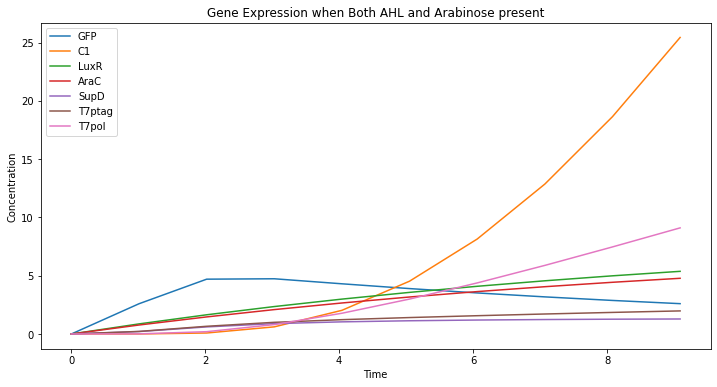

In [109]:
# Plotting the results for different scenarios
plt.figure(figsize=(12, 6))

# Plot for Scenario 4: Both AHL and Arabinose are present
plt.plot(t1[0:10], GFP4[0:10], label='GFP')
plt.plot(t1[0:10], Y4[:,7][0:10], label='C1')
plt.plot(t1[0:10], Y4[:,2][0:10], label='LuxR')
plt.plot(t1[0:10], Y4[:,3][0:10], label='AraC')
plt.plot(t1[0:10], Y4[:,4][0:10], label='SupD')
plt.plot(t1[0:10], Y4[:,5][0:10], label='T7ptag')
plt.plot(t1[0:10], Y4[:,6][0:10], label='T7pol')

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Gene Expression when Both AHL and Arabinose present')
plt.legend()

# Display the plot
plt.show()